In [71]:
import scarches as sca
import scanpy as sc
import torch
import numpy as np

In [100]:
adata = sc.read('heart_scvi_preproc.h5ad')

In [101]:
#adata = adata[np.random.choice(adata.n_obs, 1000, replace=False)].copy()

In [102]:
sca.models.CellDecoder.setup_anndata(adata, batch_key='cell_source', layer='counts')

INFO     Using batches from adata.obs["cell_source"]                                         
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Successfully registered anndata object containing 18641 cells, 1971 vars, 4 batches,
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


In [103]:
cdec = sca.models.CellDecoder(adata)

In [104]:
cdec.train(max_epochs=50, batch_size=5000, early_stopping=False, plan_kwargs=dict(kl_weight=1., weight_decay=0.))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████████████████████████████████████████████| 50/50 [01:47<00:00,  2.14s/it, loss=579, v_num=1]


In [105]:
adata.obsm["X_cdec"] = cdec.module.z_m.data.cpu().numpy()

In [106]:
sc.pp.neighbors(adata, use_rep='X_cdec')
sc.tl.umap(adata)

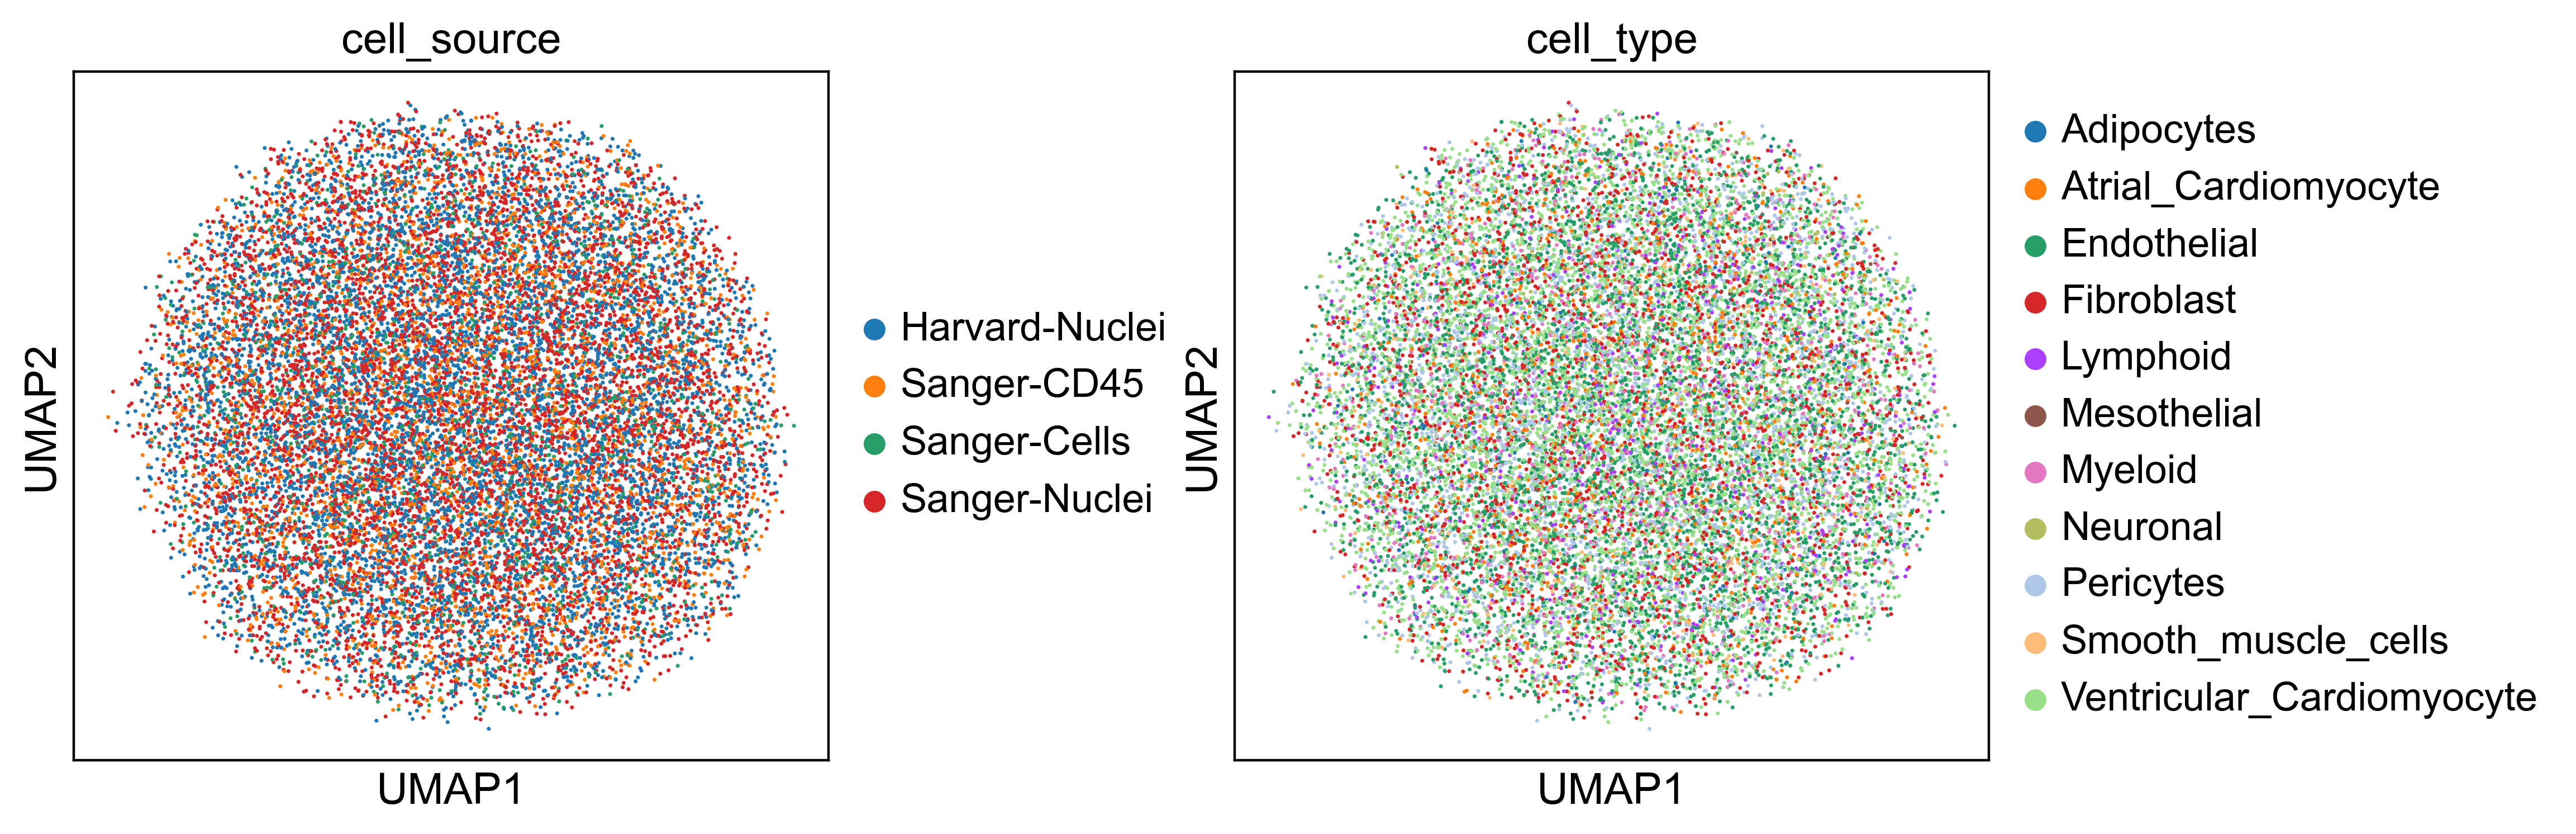

In [107]:
sc.pl.umap(adata, color=['cell_source', 'cell_type'], wspace=0.4)